In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
cols = ["No", "Time_Offset", "Type", "ID", "Data_Length", 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight']

In [2]:
#importing dataset
def Convert_to_Dataframe(path):
    test = pd.read_csv(path, encoding='cp949', index_col=0)
    b = []
    for i in test.index:
        temp = i.split(" ")
        b.append(list(filter(('').__ne__, temp)))
    #final = pd.DataFrame(b, columns = ["No", "Time_Offset", "Type", "ID", "Data_Length", 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight'])
    final = pd.DataFrame(b, columns = cols)
    return final

In [3]:
def find_median(data_frame, single_ID):
    temp = data_frame[data_frame['ID'] == single_ID]
    times_off = temp['Time_Offset'].values.tolist()
    if len(times_off) == 0:
        return 0
    start_in = 0
    t = float(times_off[0])
    tur = []
    for i in range(0, len(times_off)):
        if float(times_off[i]) > t+1000 or i == len(times_off) - 1:
            tur.append(i - start_in + 1)
            start_in = i
            t = float(times_off[start_in])
    return np.median(tur)

In [4]:
emergency = Convert_to_Dataframe("Dataset_scenario/emergencylight.trc")
emergency

,No,Time_Offset,Type,ID,Data_Length,One,Two,Three,Four,Five,Six,Seven,Eight
0,1),7.7,Rx,0366,7,0C,68,0C,00,00,00,00,None
1,2),7.9,Rx,0367,8,00,00,00,00,70,00,00,00
2,3),8.2,Rx,0368,8,00,00,00,00,00,00,00,60
3,4),8.4,Rx,0260,8,02,0C,05,30,00,A7,51,21
4,5),8.6,Rx,0329,8,4B,C0,7E,8C,11,27,00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81580,81581),31048.9,Rx,038D,8,00,00,48,00,40,00,00,82
81581,81582),31049.1,Rx,038E,5,7E,02,00,00,00,None,None,None
81582,81583),31049.3,Rx,0420,8,90,1E,20,C8,FC,4F,6A,82
81583,81584),31049.6,Rx,0421,8,00,00,00,FF,E3,7F,00,38


In [5]:
normal = Convert_to_Dataframe("Dataset_scenario/조작 X.trc")
normal

,No,Time_Offset,Type,ID,Data_Length,One,Two,Three,Four,Five,Six,Seven,Eight
0,1),5442.2,Rx,0389,8,00,00,00,00,00,00,00,00
1,2),5442.4,Rx,038D,8,00,00,48,00,30,00,00,CA
2,3),5442.7,Rx,0329,8,84,B3,7E,8C,11,28,00,10
3,4),5442.9,Rx,0420,8,B0,1E,A0,C8,FC,4F,6A,82
4,5),5443.2,Rx,0421,8,00,00,00,FF,E3,7F,00,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67445,67446),31160.0,Rx,0391,8,00,00,00,00,00,00,00,00
67446,67447),31160.1,Rx,04F1,4,20,00,64,41,None,None,None,None
67447,67448),31160.4,Rx,050C,8,C0,0C,03,11,05,20,00,70
67448,67449),31160.6,Rx,0260,8,01,0D,05,30,00,A7,61,20


In [6]:
nID = normal["ID"]
nID = list(dict.fromkeys(nID))
nID.sort()
nID

['0043',
 '007F',
 '0130',
 '0140',
 '0153',
 '0162',
 '0164',
 '0220',
 '0251',
 '0260',
 '02B0',
 '0329',
 '0340',
 '0356',
 '0366',
 '0367',
 '0368',
 '0381',
 '0386',
 '0387',
 '0389',
 '038D',
 '038E',
 '038F',
 '0391',
 '0394',
 '0410',
 '0420',
 '0421',
 '0428',
 '0436',
 '0453',
 '0470',
 '047F',
 '0483',
 '048A',
 '048C',
 '0492',
 '0495',
 '04A2',
 '04A7',
 '04A9',
 '04C9',
 '04CB',
 '04F1',
 '0500',
 '0507',
 '050A',
 '050C',
 '050E',
 '0520',
 '052A',
 '0533',
 '0534',
 '0535',
 '0536',
 '0537',
 '053E',
 '0541',
 '0544',
 '0553',
 '0559',
 '0562',
 '0563',
 '0568',
 '0572',
 '057F',
 '0586',
 '058B',
 '0593',
 '05A4',
 '05B0',
 '05BE',
 '05C7',
 '07D0',
 '07D4',
 '07D8',
 '07DC']

In [7]:
id_med_ent = []
for i in nID:
    id_med_ent.append(find_median(normal, i))


In [8]:
er_id_med_ent = []
for i in nID:
    er_id_med_ent.append(find_median(emergency, i))


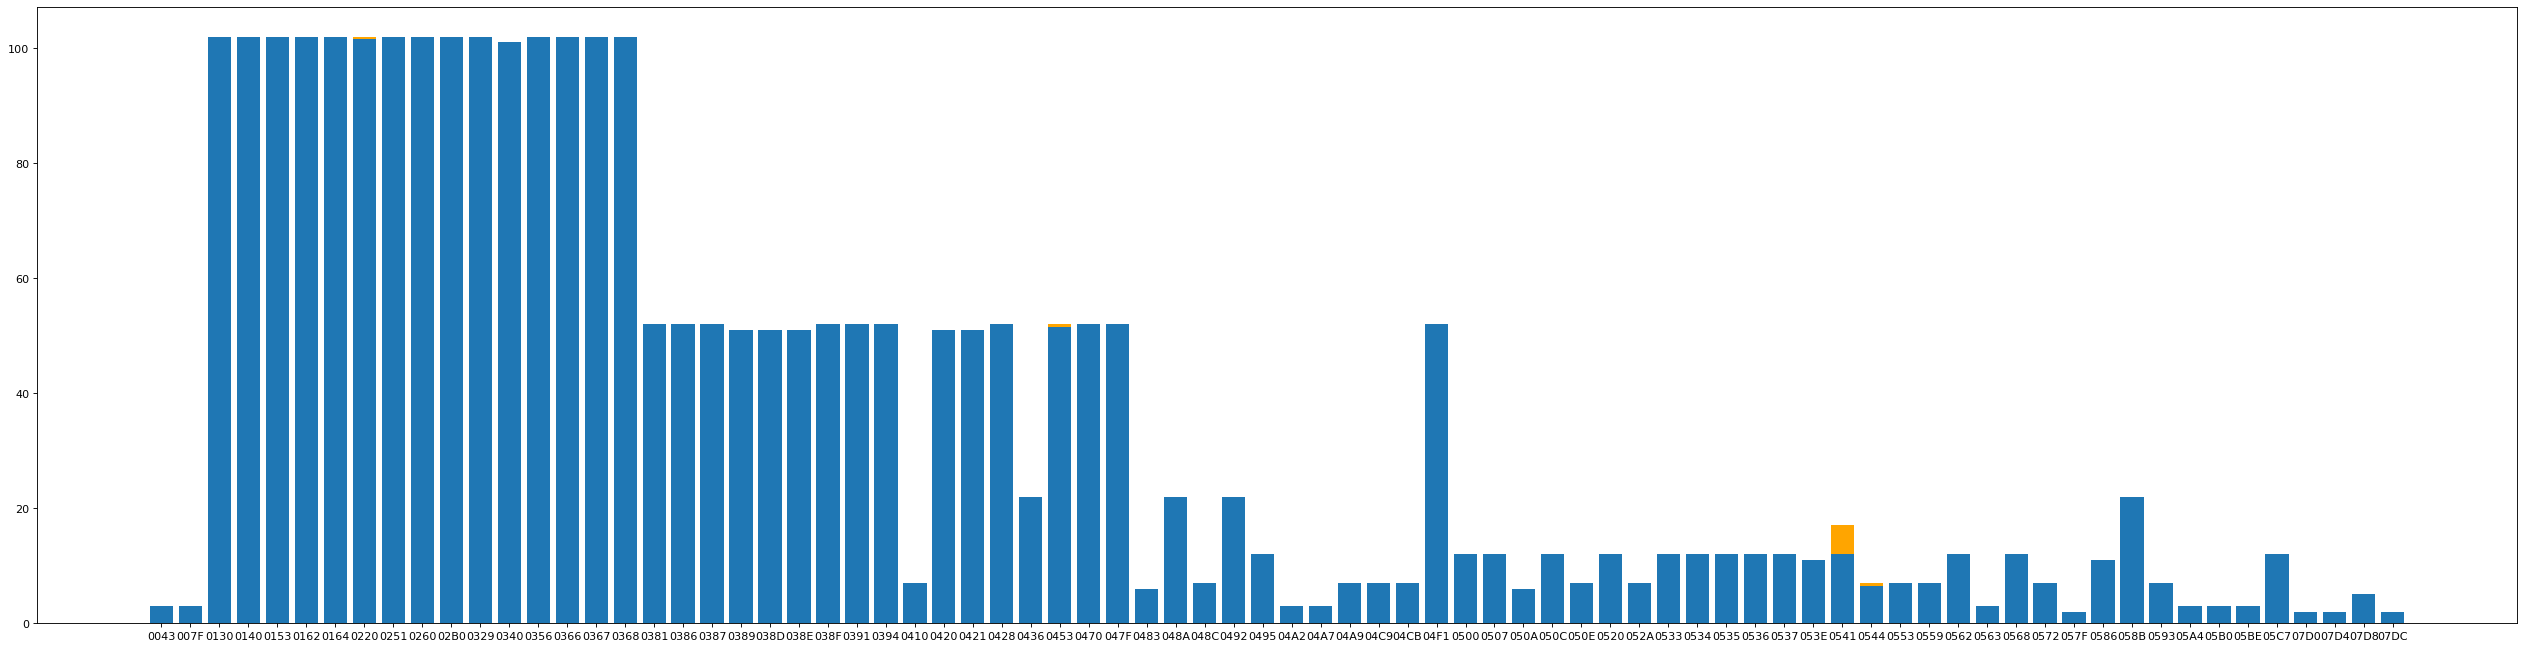

In [9]:
figure(figsize=(40, 10), dpi=80)
plt.bar(nID, er_id_med_ent, color="orange")
plt.bar(nID, id_med_ent)

plt.show()

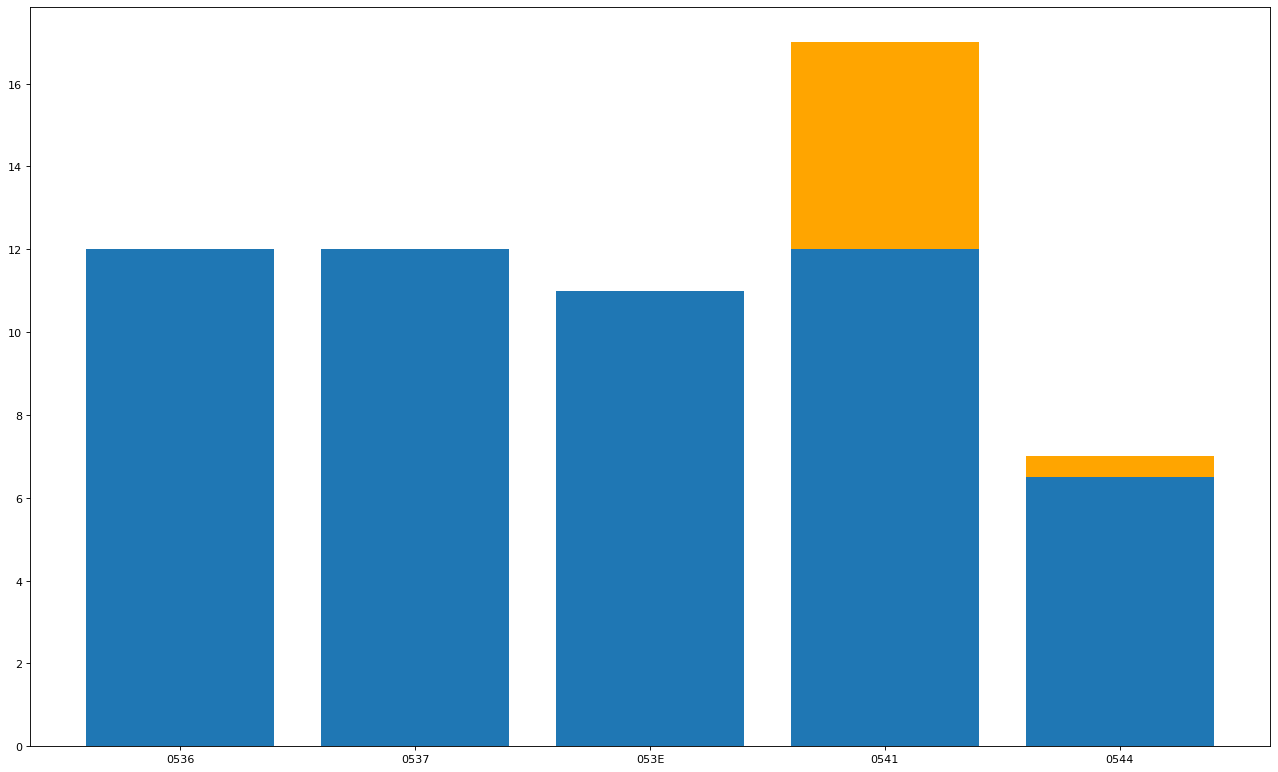

In [10]:
figure(figsize=(20, 12), dpi=80)
plt.bar(nID[55:60], er_id_med_ent[55:60],color="orange")
plt.bar(nID[55:60], id_med_ent[55:60])

plt.show()